In [1]:
import pandas as pd
import numpy as np

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 2000


In [3]:
# Generate data with typical ranges for each feature
data = {
    'Solar Irradiance (W/m²)': np.random.uniform(0, 1000, n_samples),    # Solar irradiance in W/m²
    'Temperature (°C)': np.random.uniform(-10, 40, n_samples),           # Temperature in Celsius
    'Wind Speed (m/s)': np.random.uniform(0, 15, n_samples),             # Wind speed in m/s
    'Voltage (V)': np.random.uniform(300, 600, n_samples),               # Voltage in V
    'Current (A)': np.random.uniform(0, 100, n_samples),                 # Current in A
    'Energy Demand (kW)': np.random.uniform(0, 500, n_samples),          # Energy demand in kW
    'Grid Frequency (Hz)': np.random.uniform(49, 51, n_samples),         # Frequency around 50 Hz
    'Energy Price (USD/kWh)': np.random.uniform(0.05, 0.30, n_samples),  # Price in USD/kWh
    'Battery Charge Level (%)': np.random.uniform(0, 100, n_samples)     # Charge level in %
}

In [4]:
# Target variable based on a weighted sum of the features with added noise
target = (
    0.3 * data['Solar Irradiance (W/m²)'] +
    0.2 * data['Temperature (°C)'] +
    0.15 * data['Voltage (V)'] +
    0.1 * data['Current (A)'] +
    0.25 * data['Energy Demand (kW)'] +
    np.random.normal(0, 10, n_samples)  # Adding some noise
)

In [5]:
data['Solar Power Output (kW)'] = target

# Convert to a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("synthetic_solar_power_dataset.csv",index=False)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
# Split features and target variable
X = df.drop(columns=['Solar Power Output (kW)']).values
y = df['Solar Power Output (kW)'].values

In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale features for non-LSTM models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Scale target for LSTM
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [12]:
X_train_lstm = scaler_X.fit_transform(X_train)
X_test_lstm = scaler_X.transform(X_test)

In [13]:
y_train_lstm = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_lstm = scaler_y.transform(y_test.reshape(-1, 1))

In [16]:
# Define function to evaluate models
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    accuracy = r2 * 100  # Accuracy as a percentage
    print(f"\n{model_name} Evaluation Metrics:")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-squared:", r2)
    print(f"Accuracy: {accuracy:.2f}%")
    return mae, mse, rmse, r2, accuracy

In [17]:
# LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True),
    LSTM(32),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
lstm_model.fit(X_train_lstm, y_train, epochs=650, batch_size=32, verbose=1)
y_pred_lstm = lstm_model.predict(X_test_lstm)



Epoch 1/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 91258.5469
Epoch 2/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86516.4766
Epoch 3/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84370.3906
Epoch 4/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84418.2812
Epoch 5/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84737.1484
Epoch 6/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82695.0781
Epoch 7/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79421.1875
Epoch 8/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78821.5391
Epoch 9/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78717.5469
Epoch 10/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78626.7578
Epoch 11/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76456.6250
Epoch 12/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76786.5312
Epoch 13/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76700.0078
Epoch 14/650
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75047.6953
Epoch 15/650
50

In [18]:

# SVM Model
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_svm, model_name="SVM")


SVM Evaluation Metrics:
MAE: 43.58535705035007
MSE: 2940.577147753546
RMSE: 54.22708868963505
R-squared: 0.6897617646975217
Accuracy: 68.98%


(43.58535705035007,
 2940.577147753546,
 54.22708868963505,
 0.6897617646975217,
 68.97617646975218)

In [19]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf, model_name="Random Forest")


Random Forest Evaluation Metrics:
MAE: 10.50116282079608
MSE: 176.78508958013504
RMSE: 13.296055414299952
R-squared: 0.9813487314008983
Accuracy: 98.13%


(10.50116282079608,
 176.78508958013504,
 13.296055414299952,
 0.9813487314008983,
 98.13487314008982)

In [20]:

# CatBoost Model
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
evaluate_model(y_test, y_pred_catboost, model_name="CatBoost")


CatBoost Evaluation Metrics:
MAE: 8.815004402405059
MSE: 123.53403947021084
RMSE: 11.11458678810017
R-squared: 0.9869668502204395
Accuracy: 98.70%


(8.815004402405059,
 123.53403947021084,
 11.11458678810017,
 0.9869668502204395,
 98.69668502204395)

In [21]:
# Ensemble Model (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[
    ('svm', svm_model),
    ('rf', rf_model),
    ('catboost', catboost_model)
])
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
evaluate_model(y_test, y_pred_ensemble, model_name="Ensemble")


Ensemble Evaluation Metrics:
MAE: 10.05261399831965
MSE: 159.12259861976338
RMSE: 12.614380627671078
R-squared: 0.9832121683220407
Accuracy: 98.32%


(10.05261399831965,
 159.12259861976338,
 12.614380627671078,
 0.9832121683220407,
 98.32121683220407)


LSTM Evaluation Metrics:
MAE: 8.836248946059206
MSE: 127.63686686540846
RMSE: 11.297648731723273
R-squared: 0.9865339916804725
Accuracy: 98.65%

SVM Evaluation Metrics:
MAE: 43.58535705035007
MSE: 2940.577147753546
RMSE: 54.22708868963505
R-squared: 0.6897617646975217
Accuracy: 68.98%

Random Forest Evaluation Metrics:
MAE: 10.50116282079608
MSE: 176.78508958013504
RMSE: 13.296055414299952
R-squared: 0.9813487314008983
Accuracy: 98.13%

CatBoost Evaluation Metrics:
MAE: 8.815004402405059
MSE: 123.53403947021084
RMSE: 11.11458678810017
R-squared: 0.9869668502204395
Accuracy: 98.70%

Ensemble Evaluation Metrics:
MAE: 10.05261399831965
MSE: 159.12259861976338
RMSE: 12.614380627671078
R-squared: 0.9832121683220407
Accuracy: 98.32%


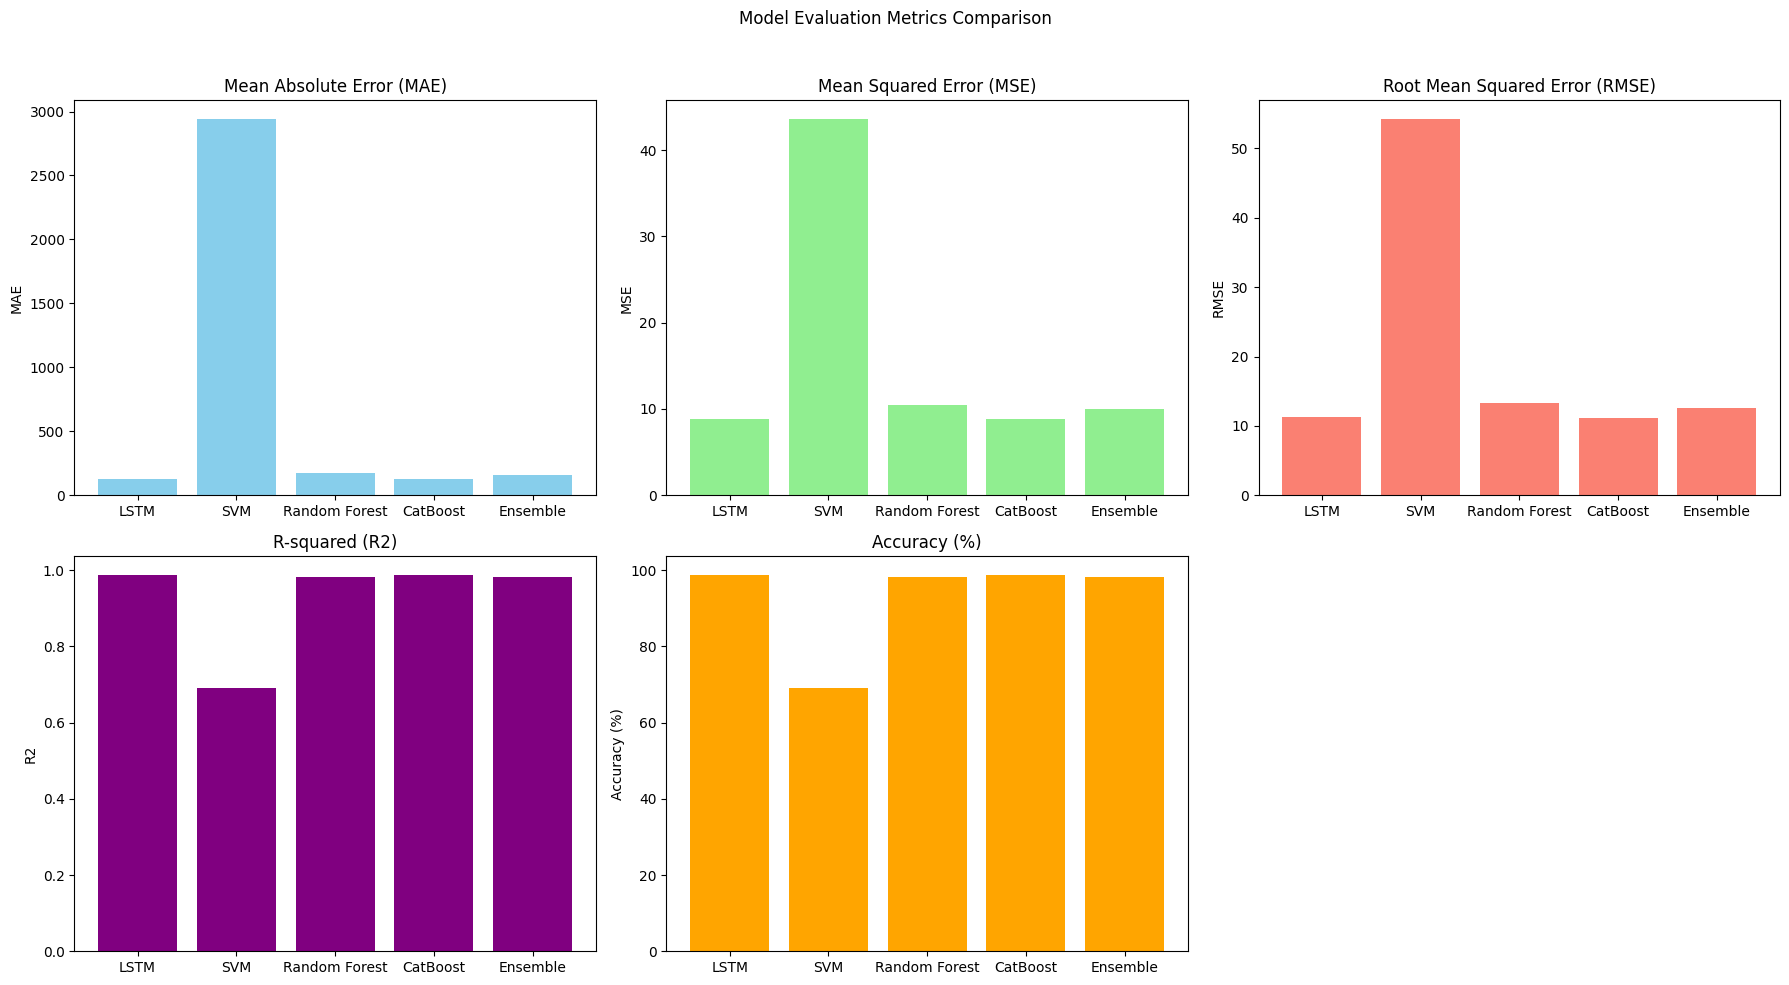

In [26]:
import matplotlib.pyplot as plt

# Store evaluation metrics for each model
model_names = ["LSTM", "SVM", "Random Forest", "CatBoost", "Ensemble"]
metrics = {
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "R2": [],
    "Accuracy (%)": []
}

# Collect metrics for each model
mse, mae, rmse, r2, accuracy = evaluate_model(y_test, y_pred_lstm, model_name="LSTM")
metrics["MAE"].append(mae)
metrics["MSE"].append(mse)
metrics["RMSE"].append(rmse)
metrics["R2"].append(r2)
metrics["Accuracy (%)"].append(accuracy)

mse, mae, rmse, r2, accuracy = evaluate_model(y_test, y_pred_svm, model_name="SVM")
metrics["MAE"].append(mae)
metrics["MSE"].append(mse)
metrics["RMSE"].append(rmse)
metrics["R2"].append(r2)
metrics["Accuracy (%)"].append(accuracy)

mse, mae, rmse, r2, accuracy = evaluate_model(y_test, y_pred_rf, model_name="Random Forest")
metrics["MAE"].append(mae)
metrics["MSE"].append(mse)
metrics["RMSE"].append(rmse)
metrics["R2"].append(r2)
metrics["Accuracy (%)"].append(accuracy)

mse, mae, rmse, r2, accuracy = evaluate_model(y_test, y_pred_catboost, model_name="CatBoost")
metrics["MAE"].append(mae)
metrics["MSE"].append(mse)
metrics["RMSE"].append(rmse)
metrics["R2"].append(r2)
metrics["Accuracy (%)"].append(accuracy)

mse, mae, rmse, r2, accuracy = evaluate_model(y_test, y_pred_ensemble, model_name="Ensemble")
metrics["MAE"].append(mae)
metrics["MSE"].append(mse)
metrics["RMSE"].append(rmse)
metrics["R2"].append(r2)
metrics["Accuracy (%)"].append(accuracy)

# Plotting Evaluation Metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Evaluation Metrics Comparison')

# MAE Plot
axes[0, 0].bar(model_names, metrics["MAE"], color='skyblue')
axes[0, 0].set_title("Mean Absolute Error (MAE)")
axes[0, 0].set_ylabel("MAE")

# MSE Plot
axes[0, 1].bar(model_names, metrics["MSE"], color='lightgreen')
axes[0, 1].set_title("Mean Squared Error (MSE)")
axes[0, 1].set_ylabel("MSE")

# RMSE Plot
axes[0, 2].bar(model_names, metrics["RMSE"], color='salmon')
axes[0, 2].set_title("Root Mean Squared Error (RMSE)")
axes[0, 2].set_ylabel("RMSE")

# R-squared Plot
axes[1, 0].bar(model_names, metrics["R2"], color='purple')
axes[1, 0].set_title("R-squared (R2)")
axes[1, 0].set_ylabel("R2")

# Accuracy Plot
axes[1, 1].bar(model_names, metrics["Accuracy (%)"], color='orange')
axes[1, 1].set_title("Accuracy (%)")
axes[1, 1].set_ylabel("Accuracy (%)")

# Hide the empty subplot (last one in the grid)
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
import numpy as np
import pandas as pd

# Reshape predictions to 1-dimensional arrays if needed
y_test = np.ravel(y_test)  # Ensures y_test is a 1D array
y_pred_lstm = np.ravel(y_pred_lstm)
y_pred_svm = np.ravel(y_pred_svm)
y_pred_rf = np.ravel(y_pred_rf)
y_pred_catboost = np.ravel(y_pred_catboost)
y_pred_ensemble = np.ravel(y_pred_ensemble)

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Energy Consumption': y_test,
    'LSTM Prediction': y_pred_lstm,
    'SVM Prediction': y_pred_svm,
    'Random Forest Prediction': y_pred_rf,
    'CatBoost Prediction': y_pred_catboost,
    'Ensemble Prediction': y_pred_ensemble
})

# Display the first few rows
print(results_df.head())

# Optionally save to CSV
results_df.to_csv("energy_consumption_predictions.csv", index=False)


   Actual Energy Consumption  LSTM Prediction  SVM Prediction  \
0                 400.721680       412.187042      327.835019   
1                 236.859802       235.783386      262.736365   
2                 477.125780       459.733429      365.189352   
3                 355.825286       369.212646      315.337695   
4                 183.483917       189.126923      249.178975   

   Random Forest Prediction  CatBoost Prediction  Ensemble Prediction  
0                412.313861           411.616868           405.210440  
1                228.940260           232.832206           229.441178  
2                461.081839           466.294226           449.897619  
3                366.857658           368.711758           369.303517  
4                188.824955           192.339655           195.505488  


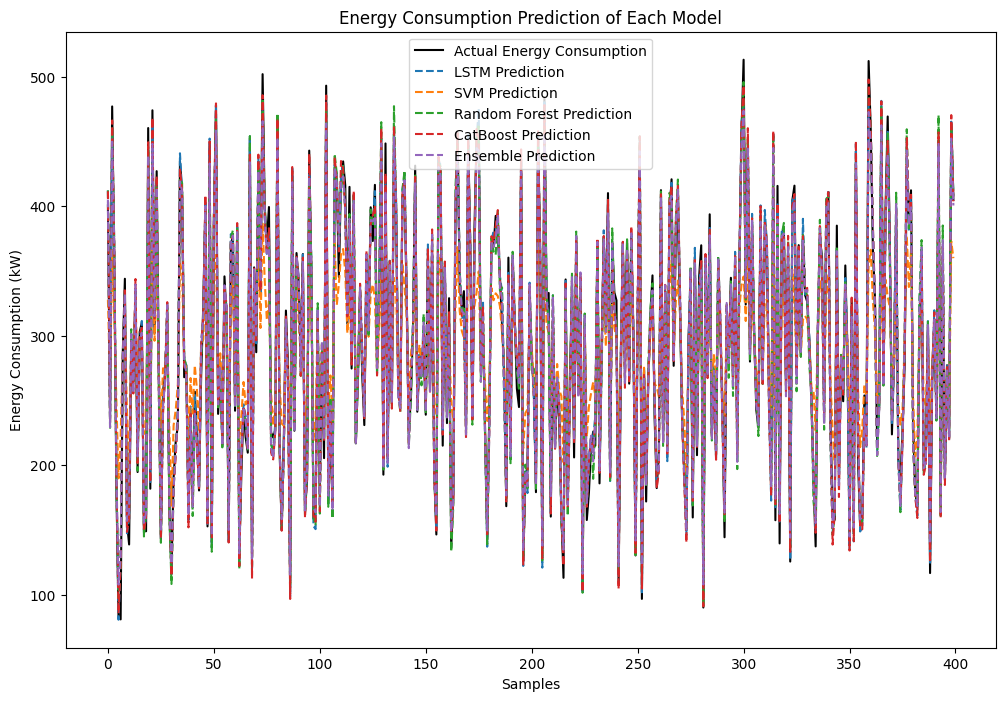

In [27]:

# Plot predictions for each model
plt.figure(figsize=(12, 8))
plt.plot(y_test, label="Actual Energy Consumption", color='black', linewidth=1.5)
plt.plot(y_pred_lstm, label="LSTM Prediction", linestyle='--')
plt.plot(y_pred_svm, label="SVM Prediction", linestyle='--')
plt.plot(y_pred_rf, label="Random Forest Prediction", linestyle='--')
plt.plot(y_pred_catboost, label="CatBoost Prediction", linestyle='--')
plt.plot(y_pred_ensemble, label="Ensemble Prediction", linestyle='--')
plt.xlabel("Samples")
plt.ylabel("Energy Consumption (kW)")
plt.title("Energy Consumption Prediction of Each Model")
plt.legend()
plt.show()